# K-Nearest Neighbors

A simple example of a simple k-nearest neighbors implementation. 

In [71]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

# zip() 
# (x1, y1), (x2, y2), (x3, y3), ...
# outputs a tuple 
#
# wrap the zip() function call with list() to 
# force it to be an array (aka list) 



In [78]:
zip(x, y)


In [79]:
list(zip(x, y))

[(4, 21),
 (5, 19),
 (10, 24),
 (4, 17),
 (3, 16),
 (11, 25),
 (14, 24),
 (8, 22),
 (10, 21),
 (12, 21)]

## Data 

zip() 

Output a tuple 

Wrap with list() to force output to list type (array)

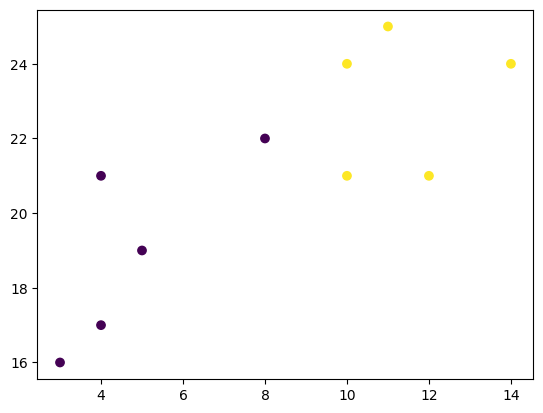

In [72]:
labels = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

# Coords
# 
# x1, y1 = 4, 21 in group 0
# ...
# x10, y10 = 12, 21 in group 1

plt.scatter(x, y, c = labels)
plt.show() 

## Model Workflow

For almost all Statistical Modeling and Machine Learning, there is a shared common workflow. At the core we create a model, fit a model to training data, and then predict on test data. However, there is also post-prediction steps such as ensembling and hyper-parameter tuning. Those are subjects for later. For this tutorial it is important to note that the core steps are what I listed above. 

In this example, we are only looking at a single, small dataset. It is as if there is just a training dataset.

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: create model 
knn = KNeighborsClassifier(n_neighbors = 2)

# Step 2: fit model on training data 
knn.fit(data, labels)

# Normally would be step 3: predict that fitted model
# on the test data 
#
# And step 4: hyper-parameter tuning and ensembling 

KNeighborsClassifier(n_neighbors=2)

### Multiple Step 1: create a model 

Create 2-neighbors, 5-neighbors, and so forth at the first step. 

In [83]:
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn8 = KNeighborsClassifier(n_neighbors = 8)


### Multiple Step 2: fit 

We fit the same training data to each different model we created. 


In [91]:
knn2.fit(data, labels)

knn5.fit(data, labels)

knn8.fit(data, labels)

KNeighborsClassifier(n_neighbors=8)

### Extend the Workflow

Next we are going to add a new point and see how the trained model would classify this new point. This is just like running our trained model on a testing dataset except our testing dataset is a single point! 

In [93]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)
print(prediction)

[0]


### Plot

Plotting the results of the new point and what group it was assigned to. 

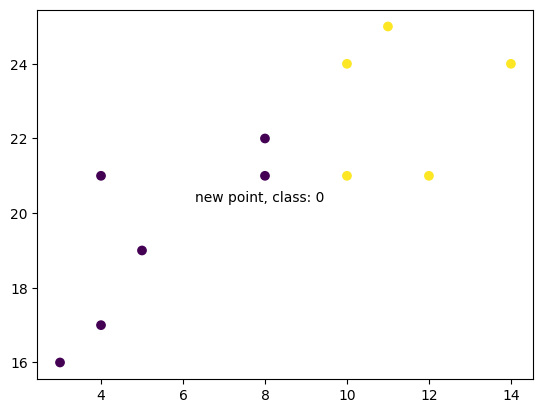

In [88]:
#plt.scatter(x + [new_x], y + [new_y], c = labels + [prediction[0]])



# x = [8, 2, ...] + [8] = [8, 2, ..., 8]

plt.scatter(x + [new_x], y + [new_y], c = labels + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

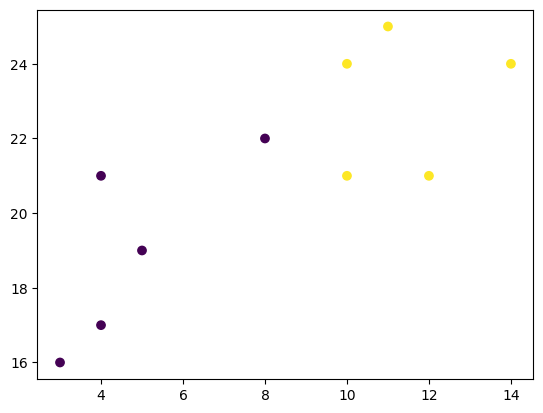

In [89]:
plt.scatter(x, y, c = labels)
#plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

### Test Data

Now we try with a small test dataset! 

In [94]:
test_x = [7, 10, 11, 7]
test_y = [22, 17, 17, 20]

test = list(zip(test_x, test_y))

predictions = knn.predict(test)

print(predictions)

[0 1 1 0]


### Predictions

Let's see the predictions on test data point 0.



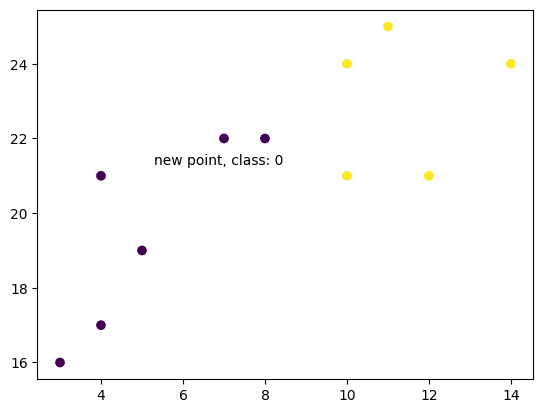

In [46]:
plt.scatter(x + [test_x[0]], y + [test_y[0]], c = labels + [predictions[0]])
plt.text(x = test_x[0] - 1.7, y = test_y[0] - 0.7, 
         s = f"new point, class: {predictions[0]}")
plt.show()

### Predictions

Let's see the prediction on test data point 1. 



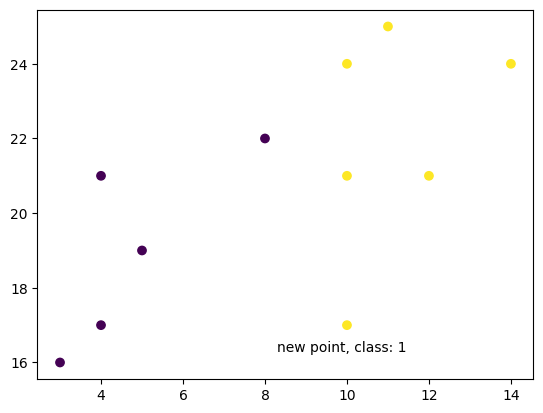

In [47]:
plt.scatter(x + [test_x[1]], y + [test_y[1]], c = labels + [predictions[1]])
plt.text(x = test_x[1] - 1.7, y = test_y[1] - 0.7, 
         s = f"new point, class: {predictions[1]}")
plt.show()

# Decision Tree Classifier 

*Switching gears* a bit here...because we are going to turn to applying a **Decision Tree Classifier** on some data on cars! 

### Decision Trees are Greedy



Just for illustrative purposes, we are going to try and predict the number of cylinders a car has based on a bunch of data around MPG per vehicle. 

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import *
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [100]:
data = pd.read_csv("data/auto-mpg.csv")

In [101]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Pure Decision Tree 

To illustrate how Decision Trees work we are going to avoid all of the preprocessing and augmentation that we should actually be doing to improve accuracy. 

### Cylinders as Dependent Variable

We are taking the number of cylinders column and making it our Dependent variable. That means all of the other columns / variables are our independent variables. 

In [102]:
X = data.drop("cylinders", axis = 1)
Y = data["cylinders"]

### 70 / 30 Split 

Take a random 70% of the data and assign as training and the other 30% as the test. We are doing this for the X (independent) and Y (dependent) variables. 

Recall, the workflow for Data Science projects is: create a model, fit model to training data, and then test that trained model on the testing data to get predictions. 

Then we look at how well the model did on the testing data in terms of confusion matrices, accuracy, precision, recall, F1 score, etc. More on all of that later! 

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

### DTC 

Decision Tree Classifier 

Split data into train and test. Fit the classifier to the training data, predict on the test data, and plot the results. 

### F1 Score 

F1 is a weighted summary of percision and recall of the model. 

F1 Score is directly in replace of accuracy. It is like an accuracy metric that also takes into account potential for under- and over-fitting a model. Those are topics that are very important in Data Science and based on the concepts of **bias-variance tradeoff**. There will be another presentation on the bias-variance tradeoff. 

In [104]:
# Step 1: create a model 
dtc = DecisionTreeClassifier()

# Step 2: fit model to training data 
dtc.fit(X_train, y_train)

# Step 3: predict trained model on test data 
y_pred = dtc.predict(X_test)

# f1 score: compare predicted y (y_pred) with true y (y_test)
f = f1_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print(f)

0.9735083749112297


## Plot Full Decision Tree


We can plot a visualization of the full decision tree. It will show how the data is split based on the various values of the independent variables. 



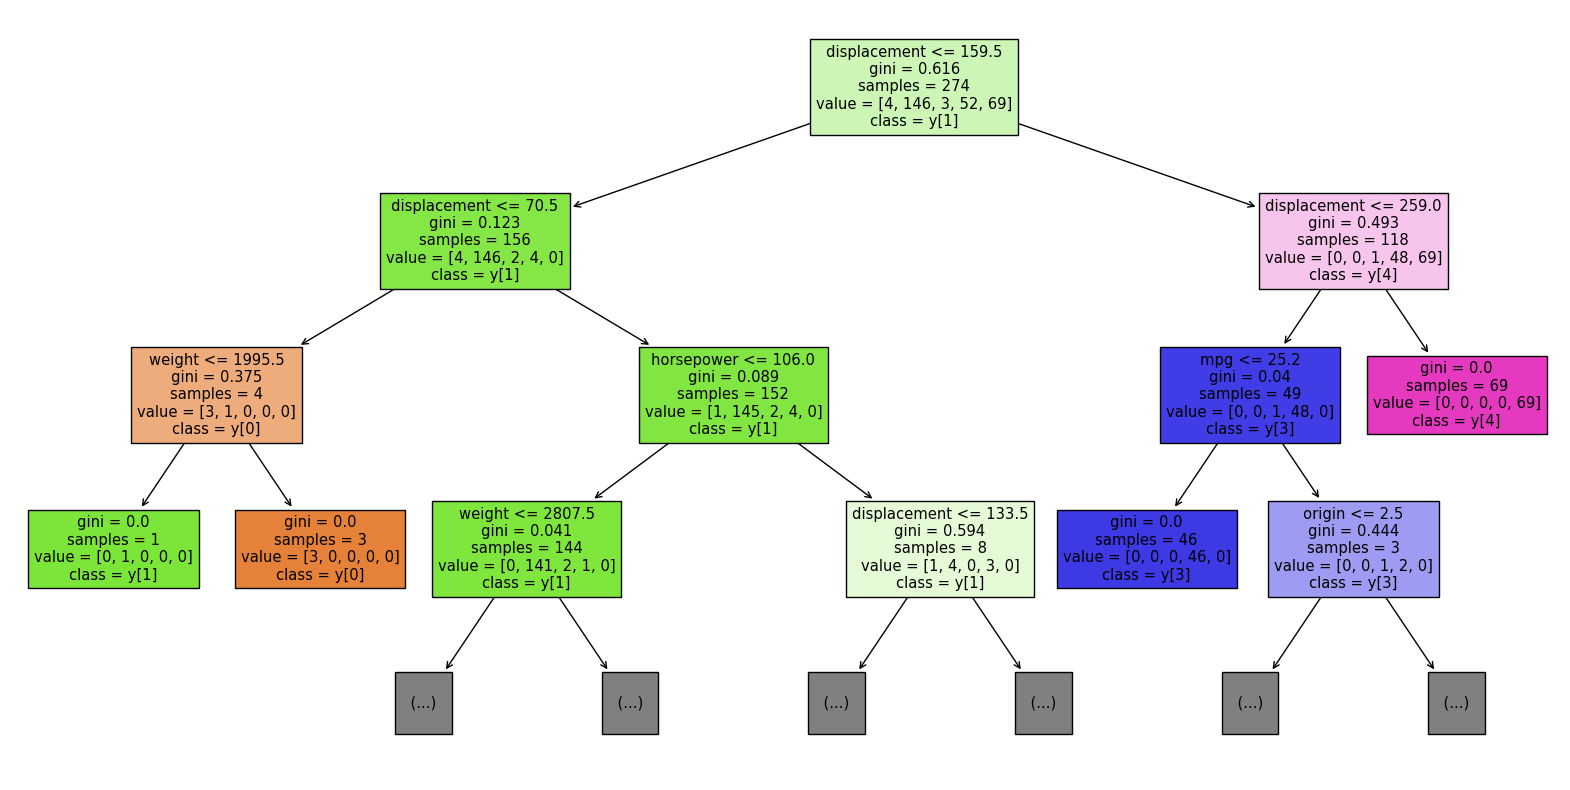

In [120]:
plt.figure(figsize = (20, 10))
plot_tree(dtc, feature_names = data.drop("cylinders", axis = 1).columns, max_depth = 3, filled = True, class_names = True)
plt.show()

### Next Steps

There are several next steps we could take. Some examples: 

- Tree Pruning
- RandomForest 
- Boosting and Bagging 
- Preprocessing: scaling and normalization